In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
# import shap

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# from pycaret.classification import *
import lightgbm as lgb
from sklearn.metrics import recall_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from skopt.space import Real, Integer, Categorical
# from skopt import gp_minimize, space
from functools import partial
from sklearn.metrics import average_precision_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('/content/sample_data/Best_dataset_fp.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Split the DataFrame into training set (90%) and test set (10%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X = train_df.drop(['TenYearCHD'], axis = 1)
y = train_df['TenYearCHD']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']


# Stacking

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from mlxtend.classifier import StackingCVClassifier



# Define the wrapper class for Keras models
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict_proba(self, X):
        predictions = self.model.predict(X)
        proba = predictions.flatten()
        proba = np.vstack([1 - proba, proba]).T
        return proba

# Define the base models
optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')

neural_network_model = KerasWrapper(optimized_model)

xgboost_model = XGBClassifier(max_depth = 4, n_estimators = 399, learning_rate = 0.14376998191774137,
                              subsample = 0.646680904808694, colsample_bytree = 0.6279281044874794, min_child_weight = 7.707299055505381)

gb_model = GradientBoostingClassifier(learning_rate = 0.024998785901829815, max_depth = 5, subsample = 0.6593086507635105,
                          max_features = 0.5352246704995934, n_estimators = 62, min_samples_split = 34, min_samples_leaf = 11)

random_forest_model = RandomForestClassifier(n_estimators=39, max_depth=6, criterion='entropy')
lr_model = LogisticRegression(C = 100.0, penalty = 'l2', solver = 'saga')

# Define meta model
meta_model = LogisticRegression()

# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define stacking classifier with base models and meta model
stacking_clf_xgb4 = StackingCVClassifier(classifiers = [neural_network_model, xgboost_model, gb_model, random_forest_model, lr_model],
                                    meta_classifier=meta_model,
                                    cv=5,
                                    stratify=True,
                                    shuffle=True,
                                    use_probas=True,
                                    use_features_in_secondary=True,
                                    verbose=2)

# Define metric as ROC
metric = roc_auc_score

# Fit the stacking classifier
stacking_clf_xgb4.fit(X.values, y.values)


# Make predictions
y_pred = stacking_clf_xgb4.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)



Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f098eea1db0>)
Training and fitting fold 1 of 5...
17/17 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
17/17 [==============================] - 0s 1ms/step
Training and fitting fold 3 of 5...
17/17 [==============================] - 0s 1ms/step
Training and fitting fold 4 of 5...
17/17 [==============================] - 0s 931us/step
Training and fitting fold 5 of 5...
17/17 [==============================] - 0s 1ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
       

21/21 [==============================] - 0s 1ms/step


(0.0, 1.0)

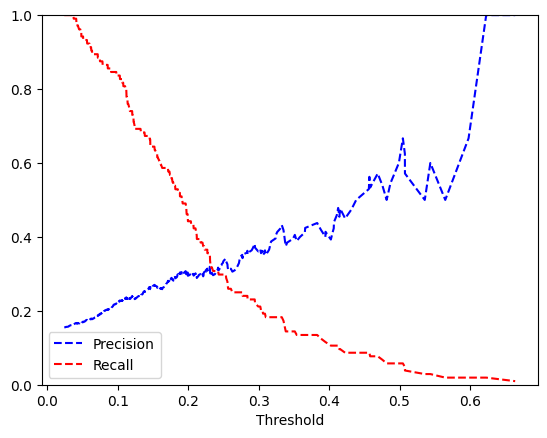

In [ ]:
y_scores = stacking_clf_xgb4.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

21/21 [==============================] - 0s 1ms/step


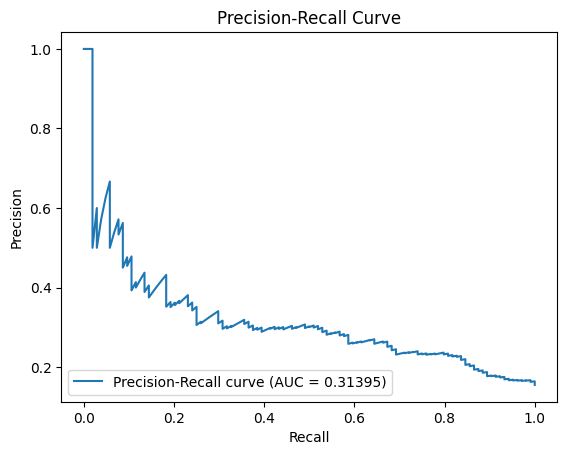

In [ ]:

# Obtain predicted probabilities for test set
y_scores = stacking_clf_xgb4.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

21/21 [==============================] - 0s 2ms/step


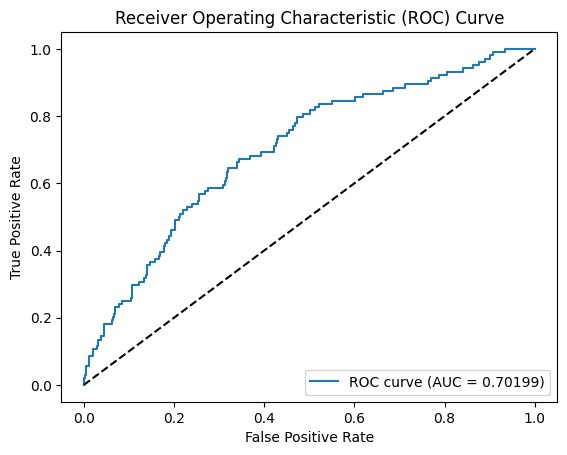

In [ ]:

# Obtain predicted probabilities for test set
y_scores = stacking_clf_xgb4.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Soft Voting

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Define the wrapper class for Keras models
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict_proba(self, X):
        predictions = self.model.predict(X)
        proba = predictions.flatten()
        proba = np.vstack([1 - proba, proba]).T
        return proba

# Define the base models
# Define the base models
optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')

neural_network_model = KerasWrapper(optimized_model)

xgboost_model = XGBClassifier(max_depth = 4, n_estimators = 399, learning_rate = 0.14376998191774137,
                              subsample = 0.646680904808694, colsample_bytree = 0.6279281044874794, min_child_weight = 7.707299055505381)

gb_model = GradientBoostingClassifier(learning_rate = 0.024998785901829815, max_depth = 5, subsample = 0.6593086507635105,
                          max_features = 0.5352246704995934, n_estimators = 62, min_samples_split = 34, min_samples_leaf = 11)

random_forest_model = RandomForestClassifier(n_estimators=39, max_depth=6, criterion='entropy')
lr_model = LogisticRegression(C = 100.0, penalty = 'l2', solver = 'saga')


# # set the weights for each classifier
# weights = [0.99, 0.993, 1.004, 1.006, 1.007]
weights = [0.8, 0.35, 2, 0.35, 1.5] # 0.318
# weights = [1.3, 0.6, 1.4, 0.6, 1.4]


classifiers = [neural_network_model, xgboost_model, gb_model, random_forest_model, lr_model]

# create the ensemble classifier
ensemble_SVW_O = EnsembleVoteClassifier(clfs=classifiers, voting='soft', weights = weights, verbose=1)

# fit the ensemble classifier on the training data
ensemble_SVW_O.fit(X, y)

from sklearn.metrics import average_precision_score



# Make predictions
y_pred = ensemble_SVW_O.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)



Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
84/84 [==============================] - 0s 1ms/step - loss: 0.4261
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
21/21 [==============================] - 0s 900us/step
AUPRC: 0.32823171204577684


21/21 [==============================] - 0s 2ms/step


(0.0, 1.0)

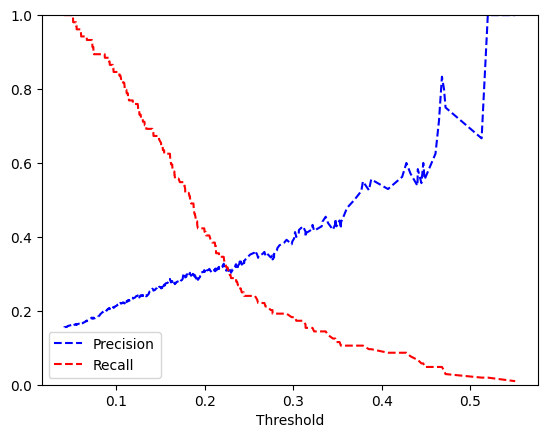

In [ ]:
y_scores = ensemble_SVW_O.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

21/21 [==============================] - 0s 1ms/step


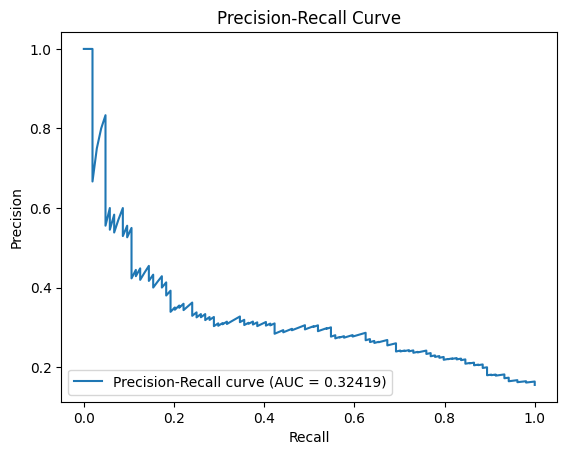

In [ ]:

# Obtain predicted probabilities for test set
y_scores = ensemble_SVW_O.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

21/21 [==============================] - 0s 932us/step


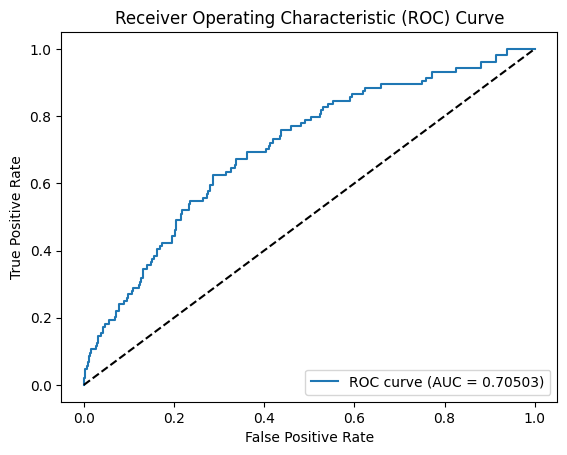

In [ ]:

# Obtain predicted probabilities for test set
y_scores = ensemble_SVW_O.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'learning_rate': 0.024998785901829815, 'max_depth': 5, 'subsample': 0.6593086507635105,
          'max_features': 0.5352246704995934, 'n_estimators': 62, 'min_samples_split': 34, 'min_samples_leaf': 11}


# Train the model
model = GradientBoostingClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.30723384692826994


(0.0, 1.0)

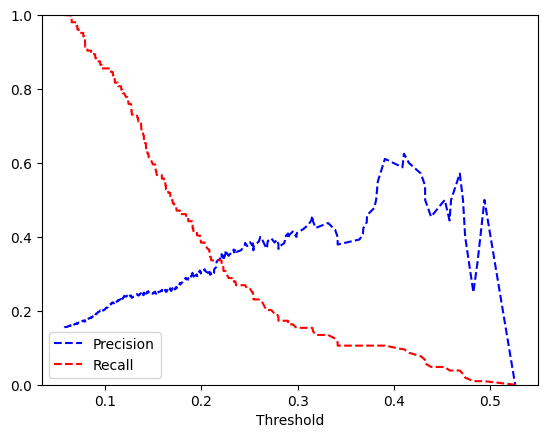

In [ ]:
y_scores = model.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

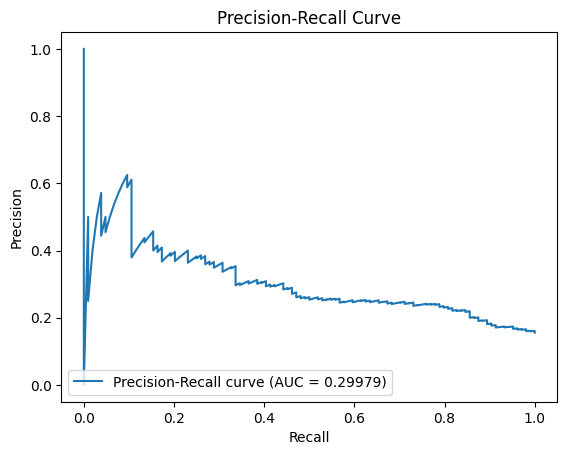

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

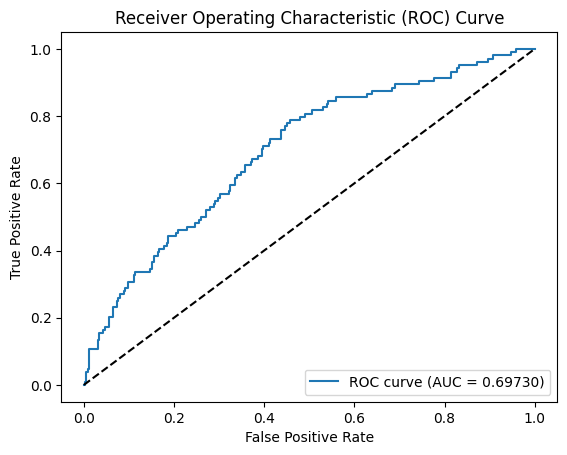

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# NN

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')


# Train the model on the training data
optimized_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Make predictions on X_test
y_test_pred_probs = optimized_model.predict(X_test)[:, 0]

# Calculate ROC-AUC score
auprc = average_precision_score(y_test, y_test_pred_probs)
print("AUPRC:", auprc)


Epoch 1/10
84/84 [==============================] - 2s 3ms/step - loss: 0.4248
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3914
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3845
Epoch 5/10
84/84 [==============================] - 0s 4ms/step - loss: 0.3890
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3849
Epoch 7/10
84/84 [==============================] - 0s 1ms/step - loss: 0.3815
Epoch 8/10
84/84 [==============================] - 0s 1ms/step - loss: 0.3823
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3821
Epoch 10/10
21/21 [==============================] - 0s 878us/step
AUPRC: 0.3066043731279446


21/21 [==============================] - 0s 1ms/step


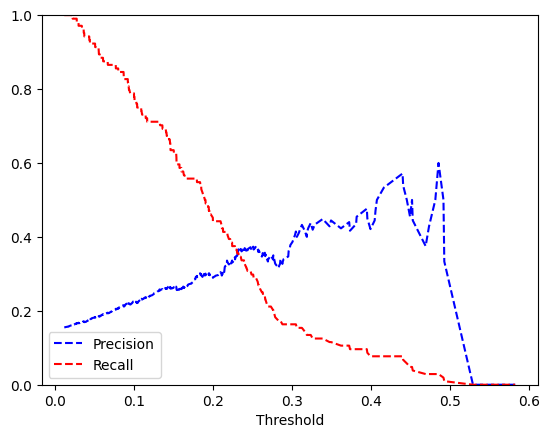

In [ ]:
y_scores = optimized_model.predict(X_test)[:, 0]  # Adjust the indexing if necessary

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0, 1])

plt.show()


21/21 [==============================] - 0s 1ms/step


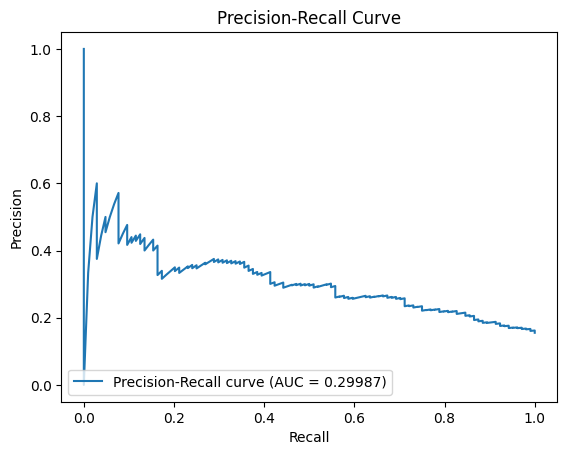

In [ ]:

# Obtain predicted probabilities for test set
y_scores = optimized_model.predict(X_test)[:, 0]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

21/21 [==============================] - 0s 1ms/step


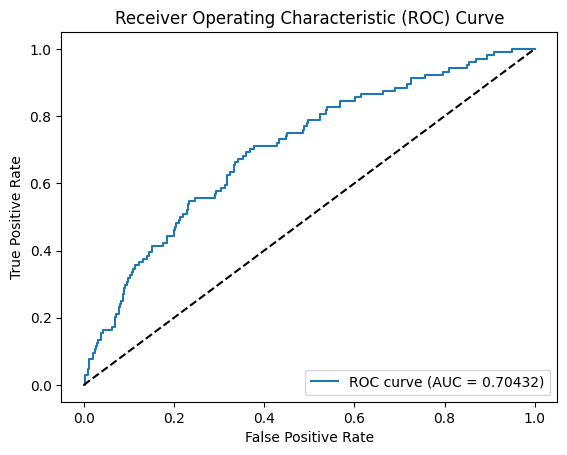

In [ ]:

# Obtain predicted probabilities for test set
y_scores = optimized_model.predict(X_test)[:, 0]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Logistic

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}

# Train the model
model = LogisticRegression(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.315314067677444


(0.0, 1.0)

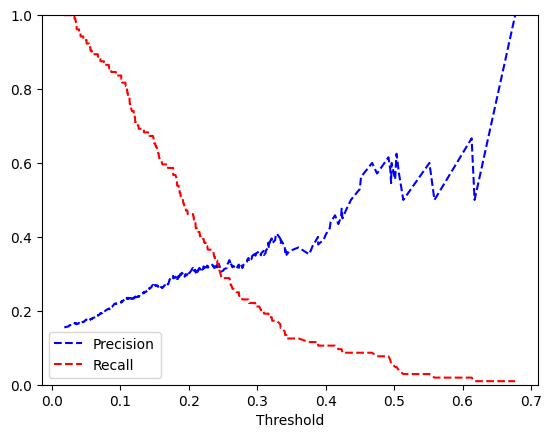

In [ ]:
y_scores = model.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

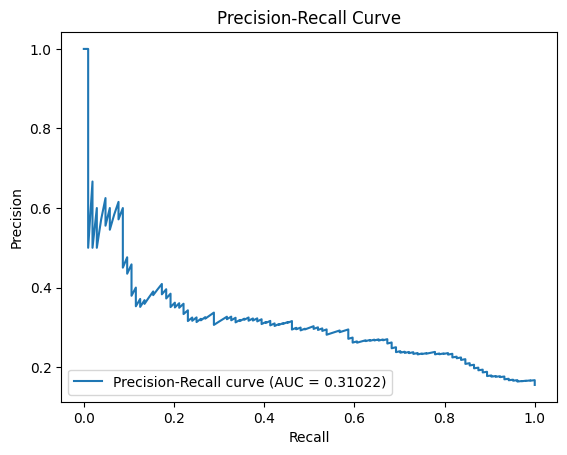

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

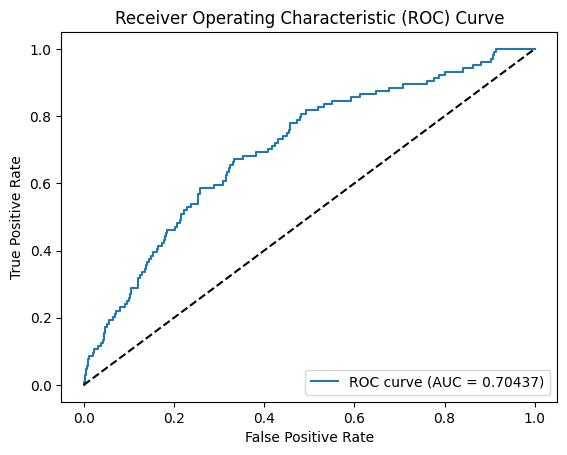

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XG

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'max_depth': 4, 'n_estimators': 399, 'learning_rate': 0.14376998191774137, 
          'subsample': 0.646680904808694, 'colsample_bytree': 0.6279281044874794, 'min_child_weight': 7.707299055505381}


# Train the model
model = xgb.XGBClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUPRC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)

AUPRC: 0.2705901706175817


(0.0, 1.0)

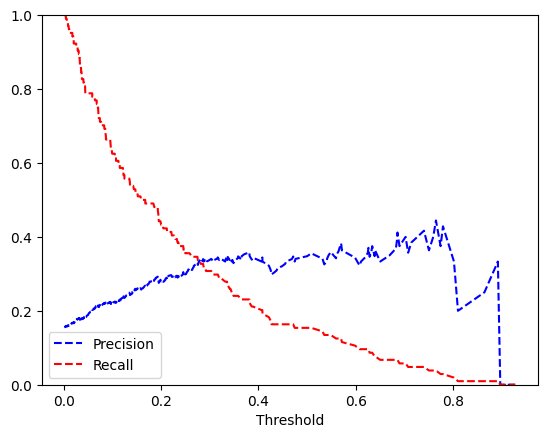

In [ ]:
y_scores = model.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

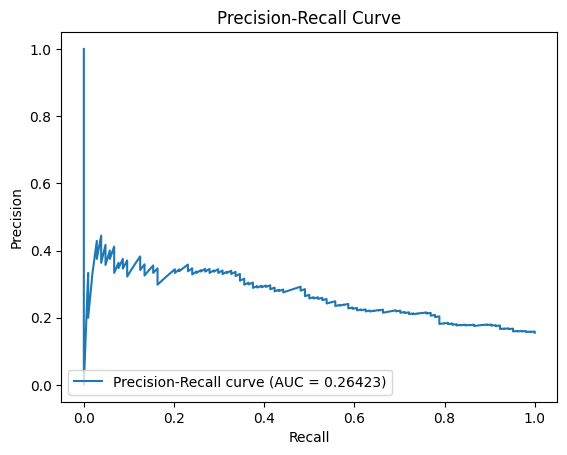

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

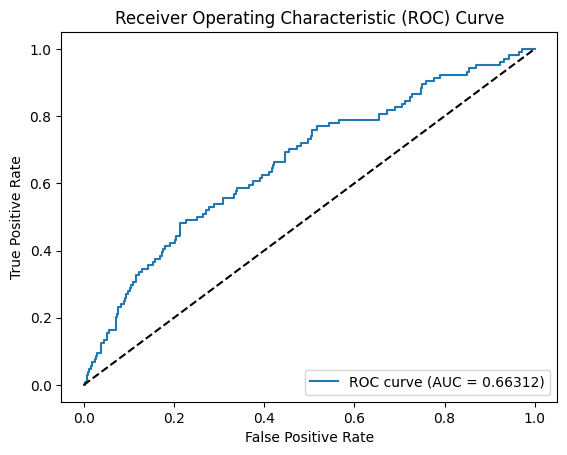

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# KNN

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'n_neighbors': 19, 'weights': 'distance'}

# Train the model
model = KNeighborsClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.2773693107662063


(0.0, 1.0)

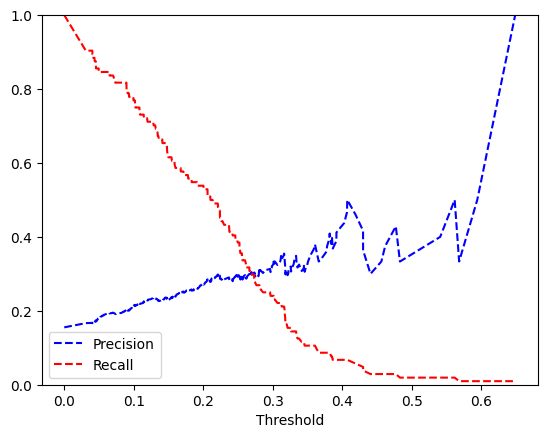

In [ ]:
y_scores = model.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

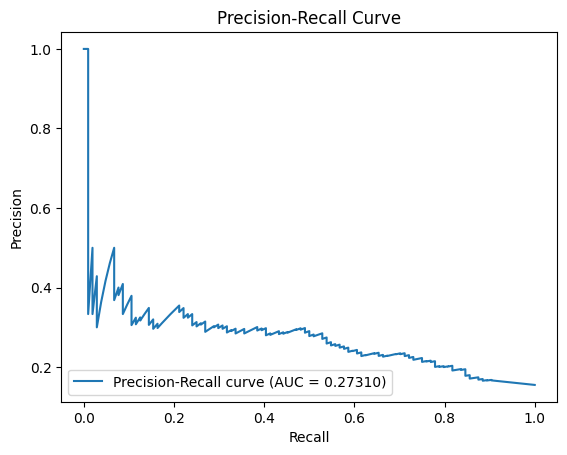

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AUC = %0.5f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

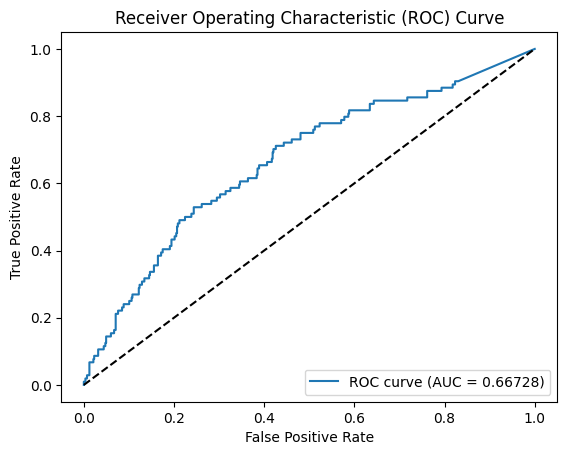

In [ ]:

# Obtain predicted probabilities for test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# CM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is the sum of the diagonal divided by the total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # If it is a binary confusion matrix, show more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            specificity = cf[0, 0] / sum(cf[:, 0])
            fpr = 1 - specificity
            fnr = 1 - recall
            tnr = specificity
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall/Sensitivity/TPR={:0.3f}\nF1 Score={:0.3f}\nFalse Positive Rate (FPR)={:0.3f}\nFalse Negative Rate (FNR)={:0.3f}\nTrue Negative Rate (TNR)={:0.3f}\nSpecificity={:0.3f}".format(
                accuracy, precision, recall, f1_score, fpr, fnr, tnr, specificity)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# Logistic with Threshold

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Define the parameters
params = {'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}

# Train the model
model = LogisticRegression(**params)
model.fit(X, y)

# Make predictions with threshold of 0.1
threshold = 0.1
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > threshold).astype(int)

# Calculate evaluation metrics
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cf_matrix.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
tnr = specificity

# Print evaluation metrics
print("Confusion Matrix:")
print(cf_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)
print("True Negative Rate (TNR):", tnr)


Confusion Matrix:
[[263 303]
 [ 17  87]]
Recall: 0.8365384615384616
Precision: 0.2230769230769231
Accuracy: 0.5223880597014925
Specificity: 0.46466431095406363
F1 Score: 0.35222672064777333
False Positive Rate (FPR): 0.5353356890459364
False Negative Rate (FNR): 0.16346153846153846
True Negative Rate (TNR): 0.46466431095406363


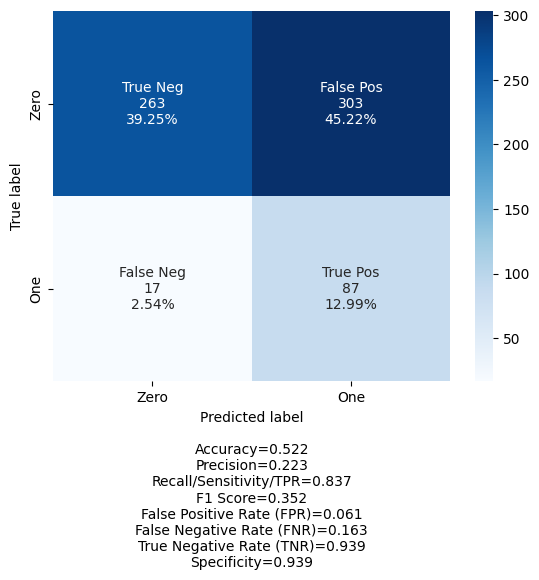

In [ ]:
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")

In [ ]:
import pickle


# Save the model as a pickle file
filename = "LR_model.pkl"
pickle.dump(model, open(filename, 'wb'))